In [4]:
import pandas as pd
import geopandas as gpd
import json

In [5]:
data_locations = {"2016-Q3": "https://opendata.arcgis.com/datasets/a7e77931d33e40d089f2f22a751a38a4_0.geojson",
                  "2016-Q4": "https://opendata.arcgis.com/datasets/674e3757160f4901a11cc56c2386929d_0.geojson",
                  "2017-Q1": "https://opendata.arcgis.com/datasets/699eedf6140943e6b7fbea068a160a4c_0.geojson",
                  "2017-Q2": "https://opendata.arcgis.com/datasets/f97fbada01e140e8ae9b1a80b85e23dc_0.geojson",
                  "2017-Q3": "https://opendata.arcgis.com/datasets/dcb37441456448d1b7459b4ed4d3dc07_0.geojson",
                  "2017-Q4": "https://opendata.arcgis.com/datasets/9fe1b43232194e43acfdde66fc90aca0_0.geojson",
                  "2018-Q1": "https://opendata.arcgis.com/datasets/a2e613feac92476f82c6f76acc46dcce_0.geojson",
                  "2018-Q2": "https://opendata.arcgis.com/datasets/fe700d1cd7864b60be391667e862f672_0.geojson",
                  "2018-Q3": "https://opendata.arcgis.com/datasets/cd5f2baea423435488c3c30b3866ac5e_0.geojson"}

In [6]:
data = {}
for key, value in data_locations.items():
    data[key] = gpd.read_file(value)
    cval = list(data[key].columns.values)
    print(key, cval)

2016-Q3 ['OBJECTID_1', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'Code', 'GattedAlley', 'GlobalID', 'SegmentID', 'CS_RoundScore', 'CD', 'SanDist', 'IllegalSeg', 'BulkySegSc', 'WdsSegSc', 'LLitterSeg', 'geometry']
2016-Q4 ['OBJECTID_1', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'Code', 'GattedAlley', 'GlobalID', 'SegmentID', 'CS_RoundScore', 'CD', 'SanDist', 'IllegalSeg', 'BulkySegSc', 'LLitterSeg', 'WdsSegSc', 'Shape__Length', 'Length', 'geometry']
2017-Q1 ['OBJECTID_1', 'OBJECTID', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'Code', 'GattedAlle', 'SegmentID', 'CS_RoundSc', 'CD', 'BulkyScore', 'LLScore', 'WdsScore', 'IDScore', 'Shape__Len', 'Shape__Length', 'geometry']
2017-Q2 ['FID', 'OBJECTID', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'SegmentID', 'Segment_Sc', 'CS_RoundSc', 'BIScore', 'IDScore', 'LLScore', 'WdsScore', 'CD', 'Shape_Leng', 'Shape_Le_1', 'GattedAlle', 'Shape__Length', 'GlobalID', 'geometry']
2017-Q3 ['OBJECTID', 'StreetName', 'GridID', 'AddressRange', 'GattedAlley', 'SegmentID', 'C

In [7]:
Q32016 = data["2016-Q3"].loc[:, ['CS_RoundScore','IllegalSeg', 'BulkySegSc', 'WdsSegSc', 'LLitterSeg', 'geometry']]
Q32016.rename(columns={'CS_RoundScore': 'CSRound', 'IllegalSeg': 'IDScore', 'BulkySegSc': 'BulkyScore', 'WdsSegSc': 'WeedScore', 'LLitterSeg': 'LLScore'}, inplace = True)
Q32016.insert(0, "YearQuarter", "2016-Q3")
Q32016.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2016-Q3,1,1,1,1,1,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2016-Q3,1,1,1,1,1,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
2,2016-Q3,1,1,1,1,1,"LINESTRING (-118.23920 34.05531, -118.23919 34..."
3,2016-Q3,1,1,1,1,1,"LINESTRING (-118.23807 34.05659, -118.23748 34..."
4,2016-Q3,1,1,1,1,1,"LINESTRING (-118.24234 34.06571, -118.24250 34..."


In [8]:
Q42016 = data["2016-Q4"].loc[:, ['CS_RoundScore','IllegalSeg', 'BulkySegSc', 'WdsSegSc', 'LLitterSeg', 'geometry']]
Q42016.rename(columns={'CS_RoundScore': 'CSRound', 'IllegalSeg': 'IDScore', 'BulkySegSc': 'BulkyScore', 'WdsSegSc': 'WeedScore', 'LLitterSeg': 'LLScore'}, inplace = True)
Q42016.insert(0, "YearQuarter", "2016-Q4")
Q42016.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2016-Q4,1,1,1,1,1,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,2016-Q4,1,1,1,1,1,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2016-Q4,1,1,1,1,1,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,2016-Q4,1,1,1,1,1,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,2016-Q4,1,1,1,1,1,"LINESTRING (-118.46766 33.98054, -118.46676 33..."


In [9]:
Q12017 = data["2017-Q1"].loc[:, ['CS_RoundSc','IDScore', 'BulkyScore', 'WdsScore', 'LLScore', 'geometry']]
Q12017.rename(columns={'CS_RoundSc': 'CSRound', 'WdsScore': 'WeedScore'}, inplace = True)
Q12017.insert(0, "YearQuarter", "2017-Q1")
Q12017.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017-Q1,1,1,1,1,1,"LINESTRING (-118.48147 34.19245, -118.48206 34..."
1,2017-Q1,1,1,1,1,1,"LINESTRING (-118.47721 34.19281, -118.47819 34..."
2,2017-Q1,1,1,1,1,1,"LINESTRING (-118.47608 34.19295, -118.47641 34..."
3,2017-Q1,1,1,1,1,1,"LINESTRING (-118.39651 34.19212, -118.39760 34..."
4,2017-Q1,1,1,1,1,1,"LINESTRING (-118.40941 34.19240, -118.41192 34..."


In [10]:
Q22017 = data["2017-Q2"].loc[:, ['CS_RoundSc','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q22017.rename(columns={'CS_RoundSc': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q22017.insert(0, "YearQuarter", "2017-Q2")
Q22017.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017-Q2,1,1,1,1,1,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2017-Q2,1,1,1,1,1,"LINESTRING (-118.47349 33.99355, -118.47313 33..."
2,2017-Q2,1,1,1,1,1,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
3,2017-Q2,1,1,1,1,1,"LINESTRING (-118.47344 33.99662, -118.47355 33..."
4,2017-Q2,1,1,1,1,1,"LINESTRING (-118.23920 34.05531, -118.23919 34..."


In [11]:
Q32017 = data["2017-Q3"].loc[:, ['CSScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q32017.rename(columns={'CSScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q32017.insert(0, "YearQuarter", "2017-Q3")
Q32017.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017-Q3,1,1,1,1,1,"LINESTRING (-118.44787 34.02799, -118.44743 34..."
1,2017-Q3,1,1,1,1,1,"LINESTRING (-118.55464 34.18223, -118.55457 34..."
2,2017-Q3,2,1,2,1,1,"LINESTRING (-118.55420 34.17414, -118.55420 34..."
3,2017-Q3,1,1,1,1,1,"LINESTRING (-118.55479 34.16829, -118.55479 34..."
4,2017-Q3,1,1,1,1,1,"LINESTRING (-118.55453 34.25799, -118.55479 34..."


In [12]:
Q42017 = data["2017-Q4"].loc[:, ['CS_RoundScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q42017.rename(columns={'CS_RoundScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q42017.insert(0, "YearQuarter", "2017-Q4")
Q42017.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017-Q4,2,1.0,1.0,1.0,2.0,"LINESTRING (-118.47762 33.99857, -118.47607 33..."
1,2017-Q4,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.31651 34.05585, -118.31651 34..."
2,2017-Q4,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.31652 34.05807, -118.31651 34..."
3,2017-Q4,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.47814 34.05258, -118.47887 34..."
4,2017-Q4,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.48295 34.05528, -118.48355 34..."


In [13]:
Q12018 = data["2018-Q1"].loc[:, ['CSScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q12018.rename(columns={'CSScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q12018.insert(0, "YearQuarter", "2018-Q1")
Q12018.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2018-Q1,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2018-Q1,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
2,2018-Q1,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.23920 34.05531, -118.23919 34..."
3,2018-Q1,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.23807 34.05659, -118.23748 34..."
4,2018-Q1,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.24234 34.06571, -118.24250 34..."


In [14]:
Q22018 = data["2018-Q2"].loc[:, ['CS_RoundSc','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q22018.rename(columns={'CS_RoundSc': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q22018.insert(0, "YearQuarter", "2018-Q2")
Q22018.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2018-Q2,1,1,1,1,1,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,2018-Q2,1,1,1,1,1,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2018-Q2,1,1,1,1,1,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,2018-Q2,1,1,1,1,1,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,2018-Q2,1,1,1,1,1,"LINESTRING (-118.46766 33.98054, -118.46676 33..."


In [15]:
Q32018 = data["2018-Q3"].loc[:, ['CS_RoundScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q32018.rename(columns={'CS_RoundScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q32018.insert(0, "YearQuarter", "2018-Q3")
Q32018.head(5)

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2018-Q3,1,1,1,1,1,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2018-Q3,1,1,1,1,1,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
2,2018-Q3,1,1,1,1,1,"LINESTRING (-118.23920 34.05531, -118.23919 34..."
3,2018-Q3,1,1,1,1,1,"LINESTRING (-118.23807 34.05659, -118.23748 34..."
4,2018-Q3,1,1,1,1,1,"LINESTRING (-118.24234 34.06571, -118.24250 34..."


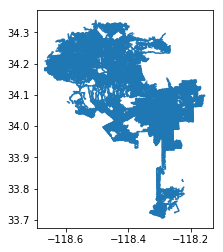

In [16]:
data["2018-Q3"].plot()

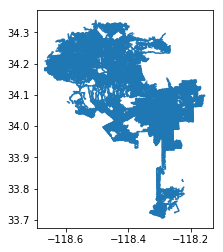

In [17]:
Q32018.plot()

In [18]:
#display(Q32016, Q42016, Q12017, Q22017, Q32017, Q42017, Q12018, Q22018, Q32018, 
#        "pd.merge(Q32016, Q42016, Q12017, Q22017, Q32017, Q42017, Q12018, Q22018, Q32018, on='Year-Quarter')")

In [19]:
#pd.concat(data)

In [20]:
ph_data = (Q32016, Q42016, Q12017, Q22017, Q32017, Q42017, Q12018, Q22018, Q32018)

In [21]:
ph_results = pd.concat(ph_data)

In [22]:
ph_results.head(10)  #382401 rows × 7 columns

,YearQuarter,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
2,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.23920 34.05531, -118.23919 34..."
3,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.23807 34.05659, -118.23748 34..."
4,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.24234 34.06571, -118.24250 34..."
5,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.23252 34.05539, -118.23227 34..."
6,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.22920 34.05924, -118.22915 34..."
7,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.25771 34.05262, -118.25784 34..."
8,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.25814 34.05314, -118.25797 34..."
9,2016-Q3,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.25833 34.05332, -118.25827 34..."


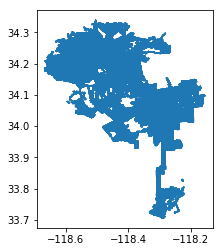

In [23]:
ph_results.plot()

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [25]:
'''from geoalchemy2 import Geometry, WKTElement
srid = 4326
ph_results_serialize = ph_results.copy()
ph_results_serialize['geometry'] = ph_results.apply(
    lambda x: WKTElement(x.geometry.wkt, srid=srid), axis=1
)'''

"from geoalchemy2 import Geometry, WKTElement\nsrid = 4326\nph_results_serialize = ph_results.copy()\nph_results_serialize['geometry'] = ph_results.apply(\n    lambda x: WKTElement(x.geometry.wkt, srid=srid), axis=1\n)"

In [26]:
'''import sqlalchemy
import os
engine = sqlalchemy.create_engine(os.environ['POSTGRES_URI'])'''

"import sqlalchemy\nimport os\nengine = sqlalchemy.create_engine(os.environ['POSTGRES_URI'])"

In [27]:
'''engine.table_names(schema='public-health')'''

"engine.table_names(schema='public-health')"

In [28]:
'''
ph_results_serialize.to_sql(
    "cleanstat",
    engine,
    schema="public-health",
    if_exists="replace",
    dtype={"geometry": Geometry("LINESTRING", srid=srid)}
)
'''

'\nph_results_serialize.to_sql(\n    "cleanstat",\n    engine,\n    schema="public-health",\n    if_exists="replace",\n    dtype={"geometry": Geometry("LINESTRING", srid=srid)}\n)\n'